(testing:exercise)=
# Testing the learning environment

Before we get started, we test the learning environment and the most important packages needed to run the notebooks. This is not so much a continuous coherent exercise as individual examples based on the different packages.This exercise is neither an introduction to Python nor extensive tutorials for the individual packages. I advise you, if you have little or no experience with the packages, to work through the relevant tutorial on the websites. All packages offer very good and extensive tutorials. Most of the functions presented here have been taken from these websites.

<div class="alert alert-block alert-success">
<b>Learning objectives:</b><br>
<ul>
 <li>Getting to know the learning environment</li>
 <li>Testing the required packages</li>
 <li>Very brief overview of the function of the packages</li>
</ul>  
</div>

<div class="alert alert-block alert-info">
<b>How to proceed:</b><br>
<ul>
 <li>Testing pandas</li>
 <li>Testing xarray</li>
 <li>Testing MetPy</li>
</ul>  
</div>

# Using pandas

Start using pandas. To load the pandas package and start working with it, import the package. The community agreed alias for pandas is pd. 


In [130]:
# Load the pandas package
import pandas as pd

Data in Pandas is represented as a table, the so-called DataFrame. A DataFrame is a 2-dimensional data structure that can store data of different types (including characters, integers, floating point values, categorical data and more) in columns. It is similar to a spreadsheet, a SQL table or the data.frame in R. Each column in a DataFrame is a Series.

<table><tr>
    <td><img align="center" valign='top' src="images/01_table_dataframe.svg" height=150 >
    <td><img align="center" valign='top' src="images/01_table_series.svg" height=150 >
</tr></table>

We start by reading data from a csv file into a DataFrame. pandas provides the read_csv() function to read data stored as a csv file into a pandas DataFrame. pandas supports many different file formats or data sources out of the box (csv, excel, sql, json, parquet, …), each of them with the prefix read_*.


<img align="center" valign='top' src="images/02_io_readwrite.svg" width=700 >

Let's start and load a automatic weather station file into a pandas dataframe

In [43]:
# Read the data into a DataFrame
df = pd.read_csv("../data/aws_valley_data_10min.csv", header=1, index_col='TIMESTAMP')

and have a look at the dataframe

In [35]:
# A simple way to plot the DataFrame
df.head()

,RECORD,BattV,PTemp_C,AirTC_1,RH_1,AirTC_2,RH_2,SlrW_1,SlrW_2,NR_Wm2,H_Flux,WS_ms,WindDir,WindDir_Std,Rain_mm_Tot,T107C_1,T107C_2,T107C_3
TIMESTAMP,,,,,,,,,,,,,,,,,,
2014-08-15 17:10:00,0,12.40,5.397,2.228,95.00,2.552,93.40,398.6,59.18,295.5,11.17,1.823,109.00,32.94,0.2,6.817,6.552,7.092
2014-08-15 17:20:00,1,12.41,4.988,2.674,91.50,2.754,91.20,181.2,28.76,98.9,9.59,0.941,13.32,35.72,0.3,6.816,6.541,7.357
2014-08-15 17:30:00,2,12.42,4.665,3.108,83.90,3.260,84.50,664.7,107.00,550.6,35.51,0.510,121.20,80.90,0.1,6.895,6.552,7.485
2014-08-15 17:40:00,3,12.42,4.859,4.057,76.95,4.068,75.96,561.1,92.30,403.7,38.57,2.607,119.50,34.43,0.0,6.992,6.560,7.820
2014-08-15 17:50:00,4,12.43,5.225,4.128,76.08,4.290,75.09,439.7,73.22,288.2,23.81,0.941,297.30,76.48,0.0,7.090,6.531,8.100


We can select a Series from the DataFrame with

In [31]:
# Retrieve the air temperature series from the DataFrame
df['AirTC_1']

TIMESTAMP
2014-08-15 17:10:00    2.228
2014-08-15 17:20:00    2.674
2014-08-15 17:30:00    3.108
2014-08-15 17:40:00    4.057
2014-08-15 17:50:00    4.128
                       ...  
2014-08-19 07:50:00    3.492
2014-08-19 08:00:00    3.401
2014-08-19 08:10:00    3.442
2014-08-19 08:20:00    3.502
2014-08-19 08:30:00    3.654
Name: AirTC_1, Length: 525, dtype: float64

do some calculations

In [32]:
# Get the maximum of the air temperature series
df['AirTC_1'].max()

10.57

As illustrated by the max() method, you can do things with a DataFrame or Series. pandas provides a lot of functionalities, each of them a method you can apply to a DataFrame or Series. As methods are functions, do not forget to use parentheses ().

You can also get some basic statistics of the data with

In [33]:
df.describe()

,RECORD,BattV,PTemp_C,AirTC_1,RH_1,AirTC_2,RH_2,SlrW_1,SlrW_2,NR_Wm2,H_Flux,WS_ms,WindDir,WindDir_Std,Rain_mm_Tot,T107C_1,T107C_2,T107C_3
count,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000
mean,262.000000,12.433714,4.330337,4.029467,69.969200,3.871389,69.749733,237.337947,40.296587,134.716682,-7.727581,1.967360,172.592168,63.328278,0.001714,7.721735,7.608937,7.763103
std,151.698715,0.039695,4.372815,2.847414,14.391682,3.262834,14.292167,355.087370,58.729396,332.135185,19.108981,1.323701,91.759963,44.753121,0.017930,3.872825,2.756063,5.399649
min,0.000000,12.370000,-2.334000,-0.219000,47.420000,-1.048000,45.130000,0.000000,0.000000,-189.000000,-31.720000,0.000000,-1.385000,0.108000,0.000000,2.300000,3.359000,0.903000
25%,131.000000,12.400000,0.479000,1.562000,58.980000,1.156000,58.730000,0.000000,0.000000,-104.300000,-22.230000,1.000000,115.400000,23.930000,0.000000,4.650000,5.406000,3.592000
50%,262.000000,12.430000,3.850000,3.401000,66.500000,3.270000,67.900000,13.370000,2.007000,-36.410000,-14.970000,1.764000,184.600000,47.350000,0.000000,7.117000,7.254000,6.385000
75%,393.000000,12.470000,7.333000,6.410000,76.200000,6.028000,77.050000,464.900000,77.880000,335.200000,2.951000,2.744000,224.300000,105.900000,0.000000,10.470000,9.460000,11.200000
max,524.000000,12.510000,13.900000,10.570000,98.600000,11.220000,97.300000,1329.000000,211.000000,1284.000000,55.090000,9.330000,354.600000,170.000000,0.300000,16.400000,13.560000,20.060000


The describe() method provides a quick overview of the numerical data in a DataFrame. Textual data is not taken into account by the describe() method.

You can simply select specific columns from a DataFrame with

In [47]:
# That's how you select the AirTC_1 and RH_1 columns from the df DataFrame
df_subset = df[["AirTC_1","RH_1"]]

# Plot the header (first 5 rows)
df_subset.head()

,AirTC_1,RH_1
TIMESTAMP,,
2014-08-15 17:10:00,2.228,95.00
2014-08-15 17:20:00,2.674,91.50
2014-08-15 17:30:00,3.108,83.90
2014-08-15 17:40:00,4.057,76.95
2014-08-15 17:50:00,4.128,76.08


The shape of the DataFrame can be accessed with

In [42]:
# Access the shape attribute. Please note, do not use parentheses for attributes. 
df_subset.shape

(525, 2)

Often you need to filter specific rows from the DataFrame, e.g.

<img align="center" valign='top' src="images/03_subset_rows.svg" width=700 >

With the following command you can simply select all rows with temperatures above 5ºC

In [54]:
# Select all rows with temerature greather than 5 degrees celsius
T_subset = df_subset[df_subset["AirTC_1"] > 5.0]

# Plot the header rows
T_subset.head()

,AirTC_1,RH_1
TIMESTAMP,,
2014-08-16 12:40:00,5.190,53.91
2014-08-16 13:30:00,5.169,56.49
2014-08-16 13:40:00,5.371,53.04
2014-08-16 15:00:00,6.038,59.87
2014-08-16 15:20:00,5.442,57.12


It is possible to combine multiple conditional statements, each condition must be surrounded by parentheses (). Moreover, you can not use or/and but need to use the or operator | and the and operator &. Here is an example

In [60]:
# Select all rows with temerature greather than 5 degrees celsius and a relative humidity above 70%
T_RH_subset = df_subset[(df_subset["AirTC_1"] > 5.0) & (df_subset["RH_1"] > 70.0)]

# Plot the header rows
T_RH_subset.head()

,AirTC_1,RH_1
TIMESTAMP,,
2014-08-17 21:10:00,5.180,73.36
2014-08-17 21:20:00,5.128,74.61
2014-08-17 21:30:00,5.018,74.83
2014-08-17 21:50:00,5.028,72.07
2014-08-18 10:50:00,5.572,82.70


Often you want to create plots from the data.

<img align="center" valign='top' src="images/04_plot_overview.svg" width=700 >

To make use of the plotting function you need to load the matplotlib package

In [62]:
# Import matplotlib
import matplotlib.pyplot as plt

You can quickly check the data visually

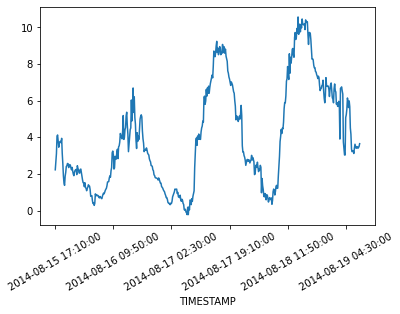

In [106]:
# Plot the temperature time series
df["AirTC_1"].plot()

# Rotate the x-labels for better readability
plt.xticks(rotation=30);

Or create horizontally stacked plots, add two time series in one plot etc. 

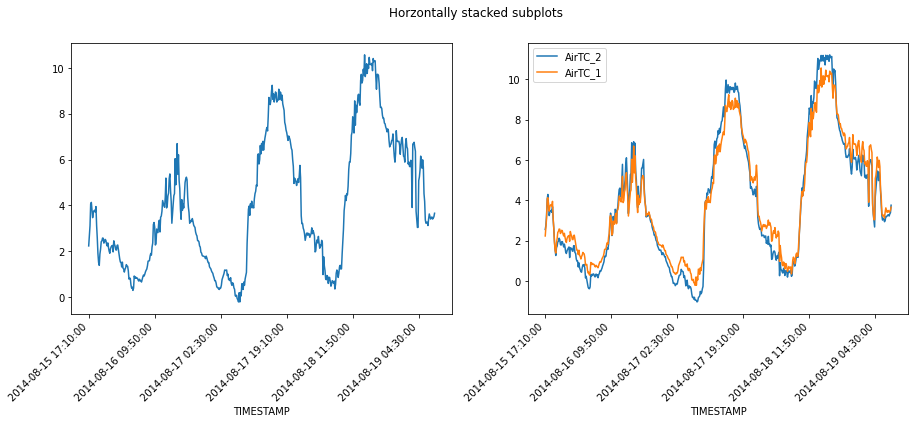

In [116]:
# Create two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Horzontally stacked subplots')

# Plot the temperature time series
df["AirTC_1"].plot(ax=ax1);
# Rotate the x-labels for better readability
ax1.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

# Plot two temperature time series in one plot
df[["AirTC_2","AirTC_1"]].plot(ax=ax2);
# Rotate the x-labels for better readability
ax2.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

Here is an example of a box plot

<AxesSubplot:>

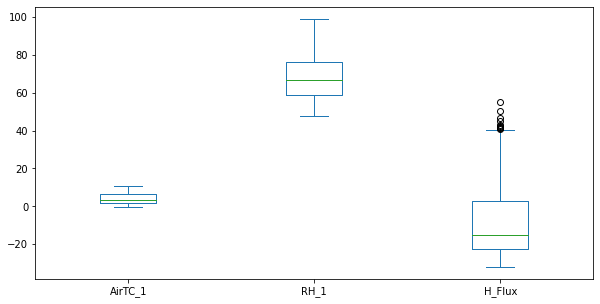

In [100]:
df[["AirTC_1","RH_1","H_Flux"]].plot.box(figsize=(10,5))

And a simple way to plot all variables in a DataFrame

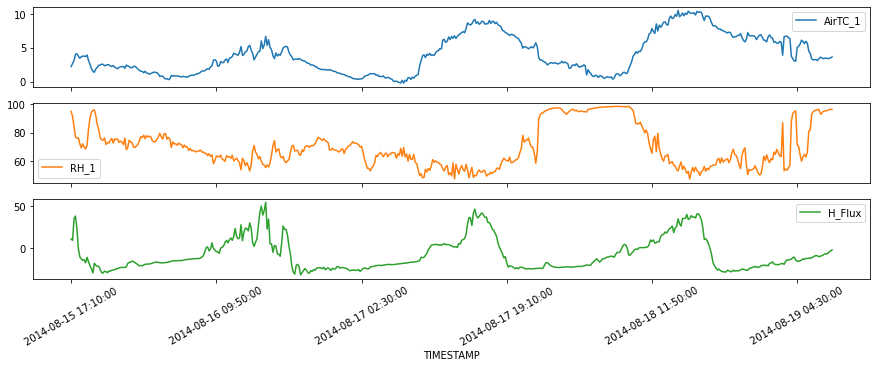

In [129]:
# Create subplots
df[["AirTC_1","RH_1","H_Flux"]].plot(figsize=(15, 5), subplots=True);

# Rotate the x-labels for better readability
plt.xticks(rotation=30);

<div class="alert alert-block alert-info">
<b>Note</b> This is just a starting point. Similar to spreadsheet software, pandas represents data as a table with columns and rows. Apart from the representation, also the data manipulations and calculations you would do in spreadsheet software are supported by pandas. 
</div>

<div class="alert alert-block alert-info">
<b>Reminder</b> 
<ul>
    <li>Import the package, aka <b>import pandas as pd</b>
    <li>A table of data is stored as a pandas DataFrame
    <li>Each column in a DataFrame is a Series
    <li>You can do things by applying a method to a DataFrame or Series
</ul> 
</div>

<div class="alert alert-block alert-warning">
<b>Homework:</b> Check out the pandas <a href="https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html">tutorial</a> and get familiar with the syntax.
</div>

# Using xarray

Multi-dimensional (a.k.a. N-dimensional, ND) arrays (sometimes called “tensors”) are an essential part of computational science. They are encountered in a wide range of fields, including physics, astronomy, geoscience, bioinformatics, engineering, finance, and deep learning. In Python, NumPy provides the fundamental data structure and API for working with raw ND arrays. However, real-world datasets are usually more than just raw numbers; they have labels which encode information about how the array values map to locations in space, time, etc.

Xarray provides a powerful and concise interface for multi-dimensional arrays (see [webpage](https://docs.xarray.dev/en/stable/index.html)). Here are some quick example of what you can do with xarray


To begin, import numpy, pandas and xarray using their customary abbreviations:

In [34]:
# Import packages
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

Xarray has two core data structures, which build upon and extend the core strengths of NumPy and pandas. Both data structures are fundamentally N-dimensional:

<ul>
<li>DataArray is our implementation of a labeled, N-dimensional array. It is an N-D generalization of a pandas.Series. 
<li>Dataset is a multi-dimensional, in-memory array database. It is a dict-like container of DataArray objects aligned along any number of shared dimensions, and serves a similar purpose in xarray to the pandas.DataFrame.
</ul>

In climate science we often use the NetCDF file format. You can directly read and write xarray objects to disk using to_netcdf(), open_dataset() and open_dataarray(). Suppose you have a netCDF of monthly mean data and we want to calculate the seasonal average. To do this properly, we need to calculate the weighted average considering that each month has a different number of days.

First, open the dataset

In [21]:
# Load a netcdf dataset with xarray
ds = xr.open_dataset("data/ear5_monthly_europe.nc")

and let's have a look to the dataset structure

In [22]:
ds

<xarray.Dataset>
Dimensions:                  (time: 36, lat: 181, lon: 269)
Coordinates:
    realization              int64 ...
  * time                     (time) datetime64[ns] 2020-01-01 ... 2022-12-01
  * lat                      (lat) float64 27.0 27.25 27.5 ... 71.5 71.75 72.0
  * lon                      (lon) float64 -22.0 -21.75 -21.5 ... 44.75 45.0
    experimentVersionNumber  (time) object ...
Data variables:
    u10                      (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.7
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      2023-04-15T09:35 GRIB to CDM+CF via cfgrib-0.9.9.1/ecCodes-...
    source:       ECMWF

The dataset contains one data variable skt which has three coordinates: time, lat, and lon. We can access the coordinates very easily with

In [23]:
# Access the time coordinates
ds.time

<xarray.DataArray 'time' (time: 36)>
array(['2020-01-01T00:00:00.000000000', '2020-02-01T00:00:00.000000000',
       '2020-03-01T00:00:00.000000000', '2020-04-01T00:00:00.000000000',
       '2020-05-01T00:00:00.000000000', '2020-06-01T00:00:00.000000000',
       '2020-07-01T00:00:00.000000000', '2020-08-01T00:00:00.000000000',
       '2020-09-01T00:00:00.000000000', '2020-10-01T00:00:00.000000000',
       '2020-11-01T00:00:00.000000000', '2020-12-01T00:00:00.000000000',
       '2021-01-01T00:00:00.000000000', '2021-02-01T00:00:00.000000000',
       '2021-03-01T00:00:00.000000000', '2021-04-01T00:00:00.000000000',
       '2021-05-01T00:00:00.000000000', '2021-06-01T00:00:00.000000000',
       '2021-07-01T00:00:00.000000000', '2021-08-01T00:00:00.000000000',
       '2021-09-01T00:00:00.000000000', '2021-10-01T00:00:00.000000000',
       '2021-11-01T00:00:00.000000000', '2021-12-01T00:00:00.000000000',
       '2022-01-01T00:00:00.000000000', '2022-02-01T00:00:00.000000000',
       '2022-03-01T00:00:00.000000000', '2022-04-01T00:00:00.000000000',
       '2022-05-01T00:00:00.000000000', '2022-06-01T00:00:00.000000000',
       '2022-07-01T00:00:00.000000000', '2022-08-01T00:00:00.000000000',
       '2022-09-01T00:00:00.000000000', '2022-10-01T00:00:00.000000000',
       '2022-11-01T00:00:00.000000000', '2022-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    realization              int64 0
  * time                     (time) datetime64[ns] 2020-01-01 ... 2022-12-01
    experimentVersionNumber  (time) object '0001' '0001' ... '0001' '0001'
Attributes:
    long_name:         time
    standard_name:     time
    axis:              T
    stored_direction:  increasing
    type:              double

We can quickly visualise the variable for a single month with

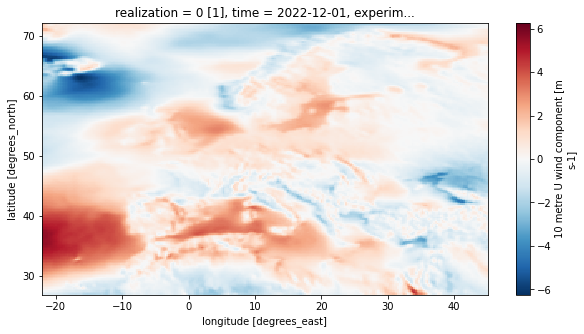

In [25]:
# Here we plot the temperature for december 2022
ds["u10"].sel(time='2022-12-01').plot(figsize=(10,5))

Suppose we want to calculate the seasonal average. To do this properly, we need to calculate the weighted average considering that each month has a different number of days.

We first have to come up with the weights - calculate the month length for each monthly data record 

In [26]:
# Get the length of each monthly data record
month_length = ds.time.dt.days_in_month

# Plot the result
month_length

<xarray.DataArray 'days_in_month' (time: 36)>
array([31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31,
       30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31,
       30, 31])
Coordinates:
    realization              int64 0
  * time                     (time) datetime64[ns] 2020-01-01 ... 2022-12-01
    experimentVersionNumber  (time) object '0001' '0001' ... '0001' '0001'

Then we calculate the weights using groupby('time.season')

In [30]:
# Calculate the weights by grouping by 'time.season'.
weights = (
    month_length.groupby("time.season") / month_length.groupby("time.season").sum()
)

# Test that the sum of the weights for each season is 1.0
np.testing.assert_allclose(weights.groupby("time.season").sum().values, np.ones(4))

Finally, we can weight the months and sum the result

In [31]:
# Calculate the weighted average
ds_weighted = (ds * weights).groupby("time.season").sum(dim="time")

Text(0.5, 1.02, 'Seasonal Surface Air Temperature')

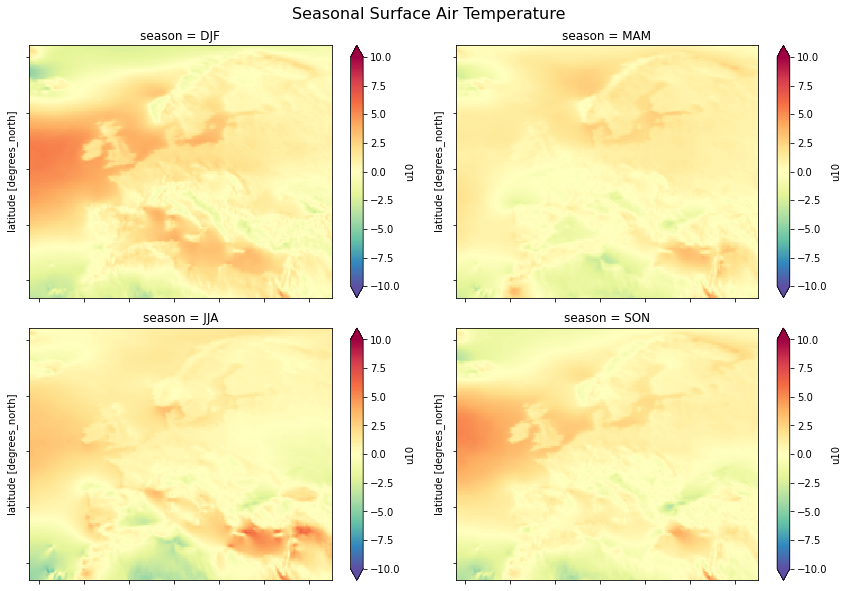

In [43]:
# Quick plot to show the results
notnull = pd.notnull(ds_weighted["u10"][0])

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

ds_weighted["u10"].sel(season='DJF').where(notnull).plot.pcolormesh(
    ax=axes[0, 0],
    vmin=-10,
    vmax=10,
    cmap="Spectral_r",
    add_colorbar=True,
    extend="both",
)
ds_weighted["u10"].sel(season='MAM').where(notnull).plot.pcolormesh(
    ax=axes[0, 1],
    vmin=-10,
    vmax=10,
    cmap="Spectral_r",
    add_colorbar=True,
    extend="both",
)
ds_weighted["u10"].sel(season='JJA').where(notnull).plot.pcolormesh(
    ax=axes[1, 0],
    vmin=-10,
    vmax=10,
    cmap="Spectral_r",
    add_colorbar=True,
    extend="both",
)
ds_weighted["u10"].sel(season='SON').where(notnull).plot.pcolormesh(
    ax=axes[1, 1],
    vmin=-10,
    vmax=10,
    cmap="Spectral_r",
    add_colorbar=True,
    extend="both",
)

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

#axes[0, 0].set_title("Weighted by DPM")
#axes[0, 1].set_title("Equal Weighting")
#axes[0, 2].set_title("Difference")

plt.tight_layout()

fig.suptitle("Seasonal Surface Air Temperature", fontsize=16, y=1.02)

You can write the results to disc

In [45]:
# Use *.to_netcdf to the write a dataset to a netcdf file
ds_weighted.to_netcdf('weigthed_temperatures.nc')

<div class="alert alert-block alert-info">
<b>Reminder</b> 
<ul>
    <li>Import the package, aka <b>import xarray as xr</b>
    <li>Data is stored as DataArray and Dataset
    <li>Dataset is a multi-dimensional container of DataArray objects aligned along any number of shared dimensions, e.g. coordinates
    <li>You can do things by applying a method to a DataArray or Dataset
    </ul> 
</div>

<div class="alert alert-block alert-warning">
<b>Homework:</b> Check out the xarray <a href="https://docs.xarray.dev/en/stable/index.html">tutorial</a> and get familiar with the syntax.
</div>